In [82]:
import pandas as pd
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import time


In [2]:
test_graph = {
    
    'Irreplaceable': ['rnb', 'pop', 'beyoince', 'female vocalist', 'soul'],
    'I Kissed a Girl': ['pop','female vocalist','katy perry','pop rock'],
    'Toxic': ['pop','dance','britney spears','female vocalists', 'sexy'],
    'SexyBack': ['pop','dance','sexy','rnb','justin timberlake'],
    
}

for node in list(test_graph.keys()):
    for edge in test_graph[node]:
        if edge in test_graph:
            test_graph[edge].append(node)
        else:
            test_graph[edge] = [node]
# test_graph.keys()

# test_graph = {
#     0: [1,2],
#     1: [0,4,3],
#     4: [1,5],
#     5: [4,3],
#     3: [5,2,1],
#     2: [3,0]

# }


In [3]:
test_graph

{'Irreplaceable': ['rnb', 'pop', 'beyoince', 'female vocalist', 'soul'],
 'I Kissed a Girl': ['pop', 'female vocalist', 'katy perry', 'pop rock'],
 'Toxic': ['pop', 'dance', 'britney spears', 'female vocalists', 'sexy'],
 'SexyBack': ['pop', 'dance', 'sexy', 'rnb', 'justin timberlake'],
 'rnb': ['Irreplaceable', 'SexyBack'],
 'pop': ['Irreplaceable', 'I Kissed a Girl', 'Toxic', 'SexyBack'],
 'beyoince': ['Irreplaceable'],
 'female vocalist': ['Irreplaceable', 'I Kissed a Girl'],
 'soul': ['Irreplaceable'],
 'katy perry': ['I Kissed a Girl'],
 'pop rock': ['I Kissed a Girl'],
 'dance': ['Toxic', 'SexyBack'],
 'britney spears': ['Toxic'],
 'female vocalists': ['Toxic'],
 'sexy': ['Toxic', 'SexyBack'],
 'justin timberlake': ['SexyBack']}

In [43]:
_graph = nx.Graph()

_graph.add_nodes_from(list(test_graph.keys()))

for node in list(test_graph.keys()):
    for edge in test_graph[node]:
        _graph.add_edge(node,edge)

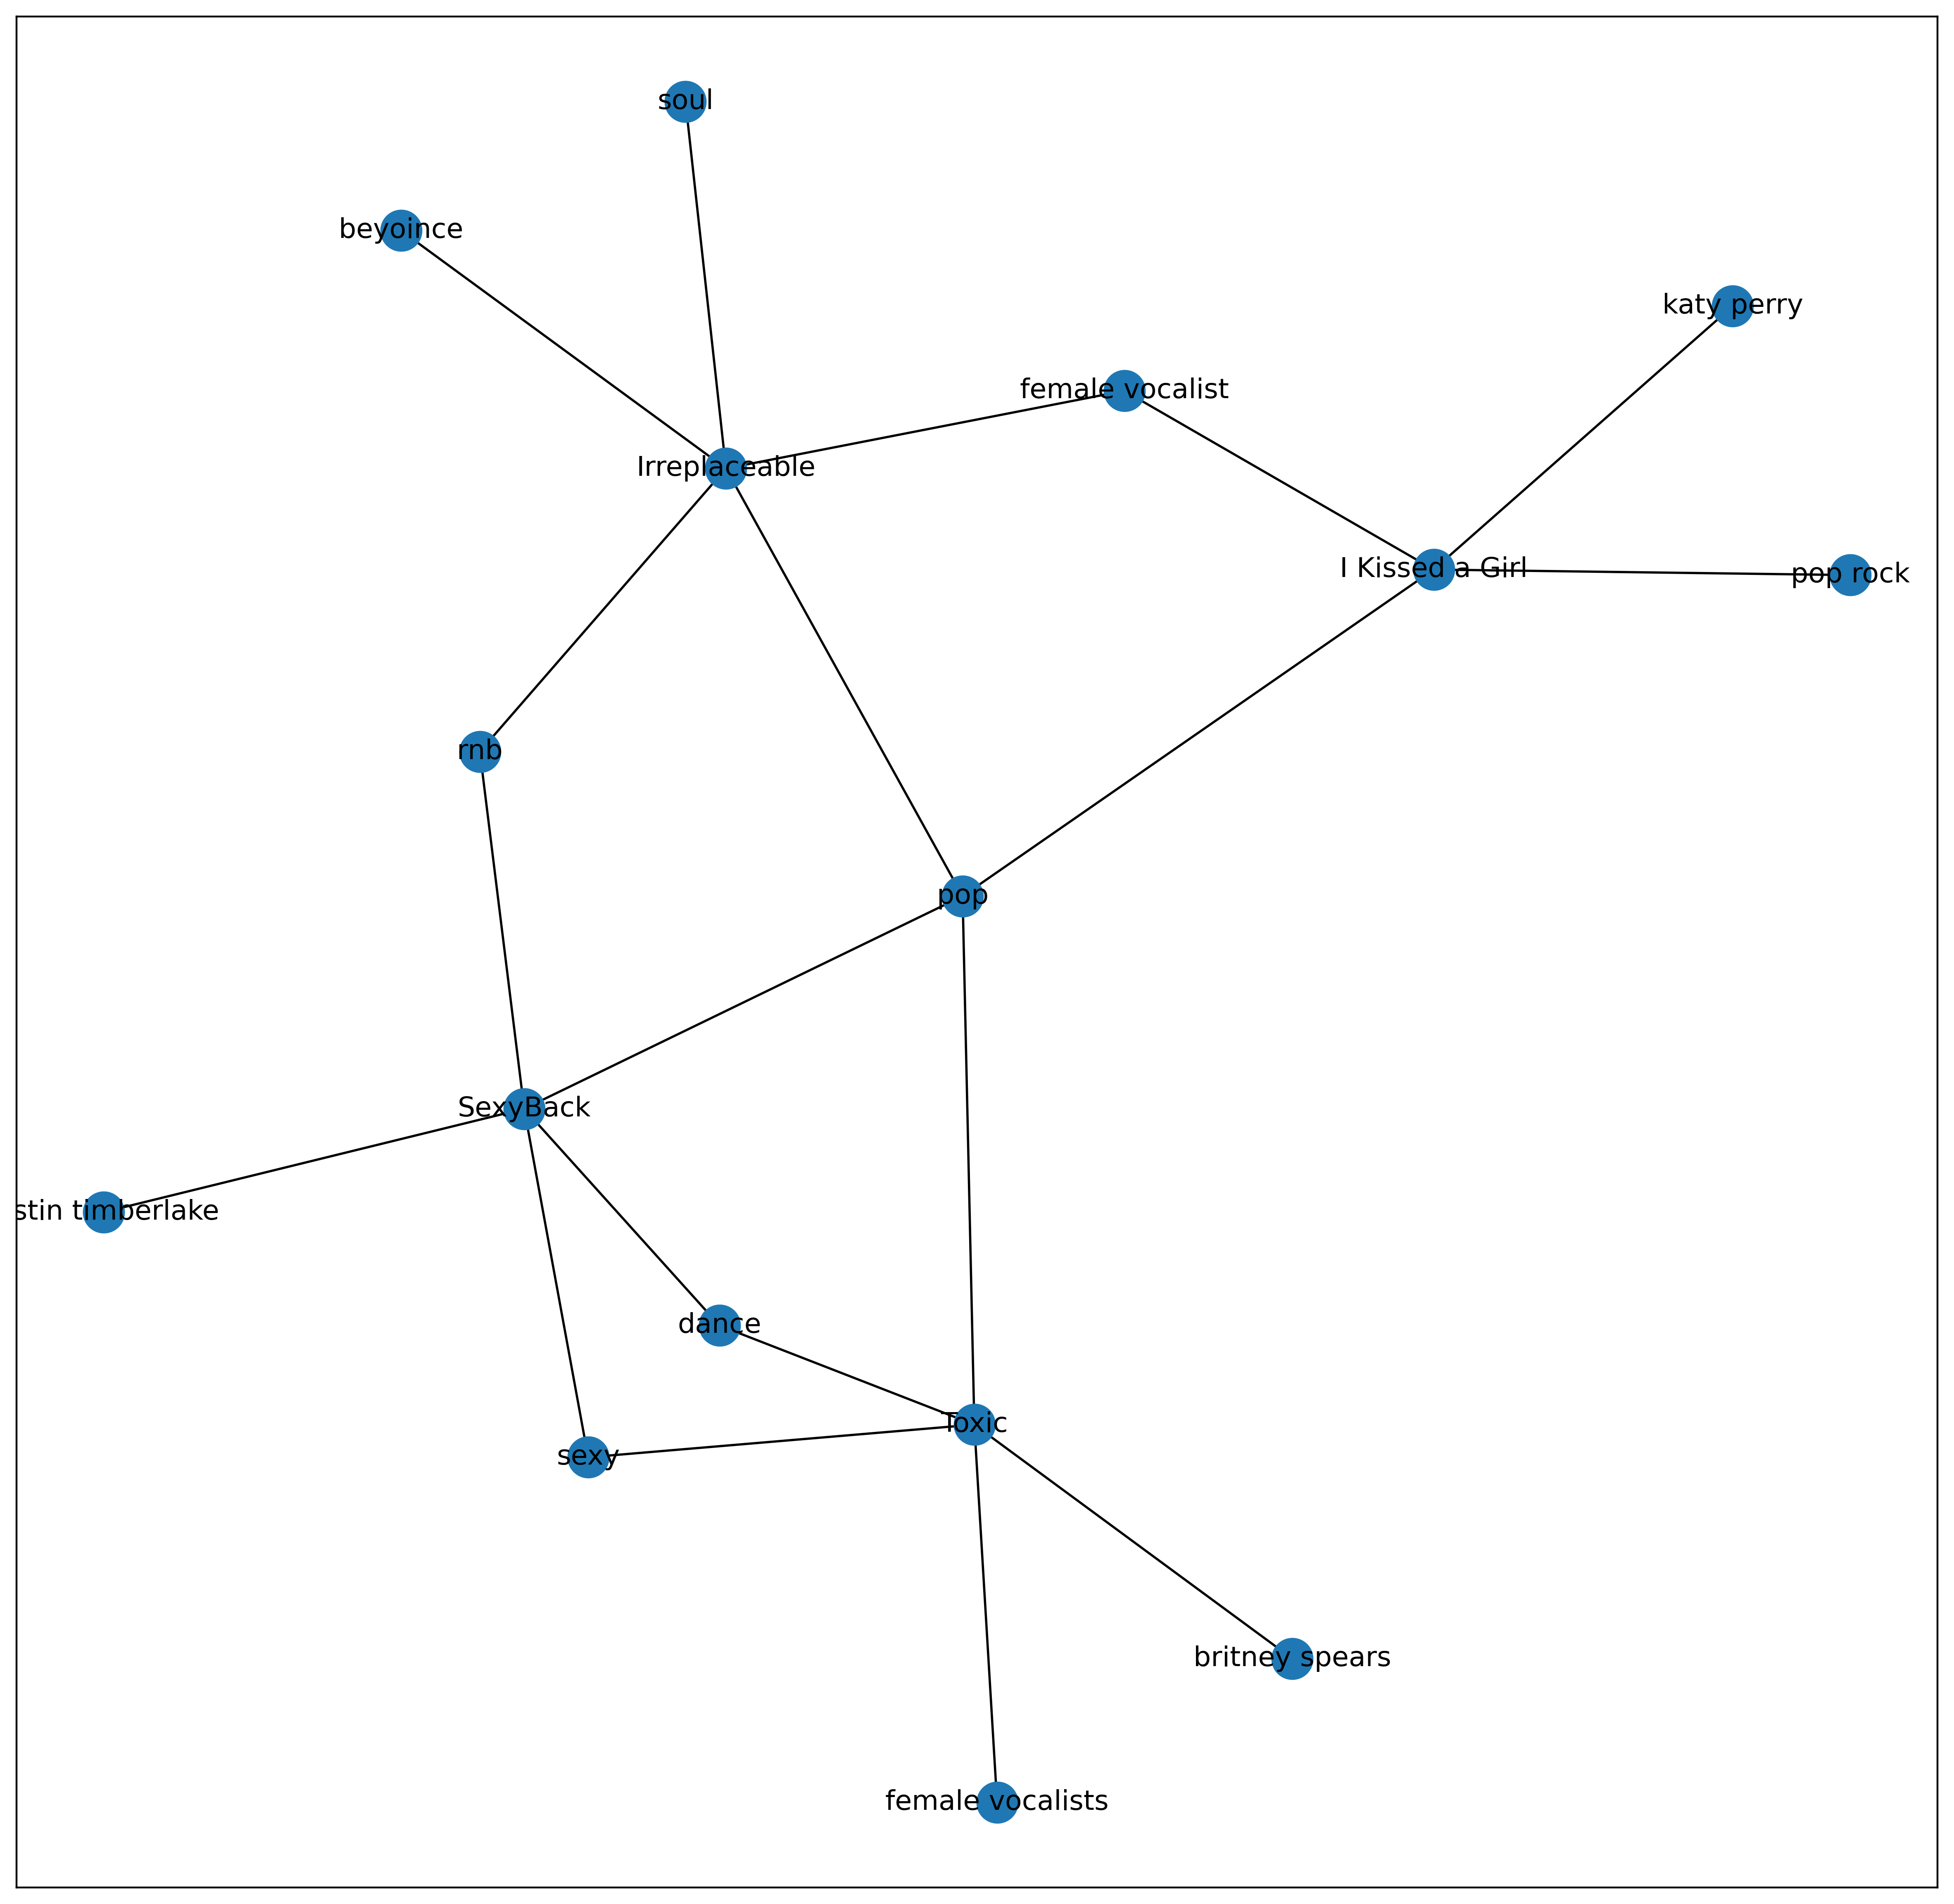

In [49]:

plt.figure(num=1,figsize=(15,15),dpi=400)
plt.rcParams.update({'font.size': 44})

nx.draw_networkx(_graph)
plt.show()

In [5]:
%%time

visited = [] # List to keep track of visited nodes.
queue = []     #Initialize a queue

def bfs(visited, graph, node):
  visited.append(node)
  queue.append(node)

  while queue:
    s = queue.pop(0) 
    print (s, end = " ") 

    for neighbour in graph[s]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

# Driver Code
bfs(visited, test_graph, 'Toxic')


Toxic pop dance britney spears female vocalists sexy Irreplaceable I Kissed a Girl SexyBack rnb beyoince female vocalist soul katy perry pop rock justin timberlake CPU times: user 7.46 ms, sys: 1.56 ms, total: 9.02 ms
Wall time: 4.28 ms


In [6]:
%%time
# finds shortest path between 2 nodes of a graph using BFS
def bfs_shortest_path(graph, start, goal):
    # keep track of explored nodes
    explored = []
    # keep track of all the paths to be checked
    queue = [[start]]
    answers = []
 
    # return path if start is goal
    if start == goal:
        return "That was easy! Start = goal"
 
    # keeps looping until all possible paths have been checked
    while queue:
        
        # pop the first path from the queue
        path = queue.pop(0)
        # get the last node from the path
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]
            # go through all neighbour nodes, construct a new path and
            # push it into the queue
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                # return path if neighbour is goal
                if neighbour == goal: #and new_path.count(goal) == 1:
                    return new_path
                    answers.append(new_path) 
                 
            # mark node as explored
            explored.append(node)
 
    # in case there's no path between the 2 nodes
    return answers

# for no in test_graph:
#     if no == "SexyBack":
#         continue
print(bfs_shortest_path(new_graph, "Smells Like Teen Spirit",'Do I Wanna Know?' ))
# bfs_shortest_path(test_graph, 'SexyBack', 'I Kissed a Girl')  # returns ['G', 'C', 'A', 'B', 'D']


['Smells Like Teen Spirit', 'rock', 'Mr. Brightside', 'indie', 'Do I Wanna Know?']
CPU times: user 340 µs, sys: 106 µs, total: 446 µs
Wall time: 377 µs


In [4]:
from collections import deque 
from sys import maxsize as INT_MAX 
test_graph = {
    0: [1,2],
    1: [0,4,3],
    4: [1,5],
    5: [4,3],
    3: [5,2,1],
    2: [3,0]
} 
# Traverses graph in BFS manner. It fills 
# dist[] and paths[] 
def BFS(adj: list, src: int, dist: list, paths: list, n: int): 
    visited = [False] * n 
    dist[src] = 0
    paths[src] = 1
  
    q = deque() 
    q.append(src) 
    visited[src] = True
    while q: 
        curr = q[0] 
        q.popleft() 
  
        # For all neighbors of current vertex do: 
        for x in adj[curr]: 
  
            # if the current vertex is not yet 
            # visited, then push it to the queue. 
            if not visited[x]: 
                q.append(x) 
                visited[x] = True
  
            # check if there is a better path. 
            if dist[x] > dist[curr] + 1: 
                dist[x] = dist[curr] + 1
                paths[x] = paths[curr] 
  
            # additional shortest paths found 
            elif dist[x] == dist[curr] + 1: 
                paths[x] += paths[curr] 
  
# function to find number of different 
# shortest paths form given vertex s. 
# n is number of vertices. 
def findShortestPaths(adj: list, s: int, n: int): 
    dist = [INT_MAX] * n 
    paths = [0] * n 
    BFS(adj, s, dist, paths, n) 
    print("Numbers of shortest Paths are:", end=" ") 
    for i in paths: 
        print(i, end=" ")
        
findShortestPaths(test_graph, 0,5)

IndexError: list index out of range

In [35]:
import collections
from sys import maxsize as INT_MAX 

test_graph = {'Irreplaceable': ['rnb', 'pop', 'beyoince', 'female vocalist', 'soul'],
 'I Kissed a Girl': ['pop', 'female vocalist', 'katy perry', 'pop rock'],
 'Toxic': ['pop', 'dance', 'britney spears', 'female vocalists', 'sexy'],
 'SexyBack': ['pop', 'dance', 'sexy', 'rnb', 'justin timberlake'],
 'rnb': ['Irreplaceable', 'SexyBack'],
 'pop': ['Irreplaceable', 'I Kissed a Girl', 'Toxic', 'SexyBack'],
 'beyoince': ['Irreplaceable'],
 'female vocalist': ['Irreplaceable', 'I Kissed a Girl'],
 'soul': ['Irreplaceable'],
 'katy perry': ['I Kissed a Girl'],
 'pop rock': ['I Kissed a Girl'],
 'dance': ['Toxic', 'SexyBack'],
 'britney spears': ['Toxic'],
 'female vocalists': ['Toxic'],
 'sexy': ['Toxic', 'SexyBack'],
 'justin timberlake': ['SexyBack']}




# BFS algorithm
def bfs(graph, root):
    n=6
    dist = [INT_MAX] * n 
    paths = [0] * n 
    visited, queue = set(), collections.deque([root])
    visited.add(root)
    dist[root] = 0
    paths[root] = 1
 
    while queue:
        curr = queue[0] 

        # Dequeue a vertex from queue
        vertex = queue.popleft()
#         print(str(vertex) + " ", end="")

        # If not visited, mark it as visited, and
        # enqueue it
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)

            # check if there is a better path. 
            if dist[neighbour] > dist[curr] + 1: 
                dist[neighbour] = dist[curr] + 1
                paths[neighbour] = paths[curr] 
  
            # additional shortest paths found 
            elif dist[neighbour] == dist[curr] + 1: 
                paths[neighbour] += paths[curr] 
                
#     print(dist[4])


bfs(test_graph,'pop')

TypeError: list indices must be integers or slices, not str

In [13]:
test_graph = {
    0: [1,2],
    1: [0,4,3],
    4: [1,5],
    5: [4,3],
    3: [5,2,1],
    2: [3,0]
}
test_graph = {'Irreplaceable': ['rnb', 'pop', 'beyoince', 'female vocalist', 'soul'],
 'I Kissed a Girl': ['pop', 'female vocalist', 'katy perry', 'pop rock'],
 'Toxic': ['pop', 'dance', 'britney spears', 'female vocalists', 'sexy'],
 'SexyBack': ['pop', 'dance', 'sexy', 'rnb', 'justin timberlake'],
 'rnb': ['Irreplaceable', 'SexyBack'],
 'pop': ['Irreplaceable', 'I Kissed a Girl', 'Toxic', 'SexyBack'],
 'beyoince': ['Irreplaceable'],
 'female vocalist': ['Irreplaceable', 'I Kissed a Girl'],
 'soul': ['Irreplaceable'],
 'katy perry': ['I Kissed a Girl'],
 'pop rock': ['I Kissed a Girl'],
 'dance': ['Toxic', 'SexyBack'],
 'britney spears': ['Toxic'],
 'female vocalists': ['Toxic'],
 'sexy': ['Toxic', 'SexyBack'],
 'justin timberlake': ['SexyBack']}
def dfs_caminhos(grafo, inicio, fim):
    pilha = [(inicio, [inicio])]
    depth = 0
    while pilha:
        vertice, caminho = pilha.pop()
        for proximo in set(grafo[vertice]) - set(caminho):
            if proximo == fim:
                yield caminho + [proximo]
            else:
                pilha.append((proximo, caminho + [proximo]))
                

answers = [len(x) for x in list(dfs_caminhos(test_graph, 'Toxic', 'I Kissed a Girl'))]
answers.count(min(answers))

1

In [14]:
t = ['SexyBack', 'pop', 'I Kissed a Girl', 'katy perry', 'I Kissed a Girl', 'I Kissed a Girl']
t.count('I Kissed a Girl')

3

In [15]:
%%time
def bfs_connected_component(graph, start):
    # keep track of all visited nodes
    explored = []
    # keep track of nodes to be checked
    queue = [start]
 
    # keep looping until there are nodes still to be checked
    while queue:
        # pop shallowest node (first node) from queue
        node = queue.pop(0)
        if node not in explored:
            # add node to list of checked nodes
            explored.append(node)
            neighbours = graph[node]
 
            # add neighbours of node to queue
            for neighbour in neighbours:
                queue.append(neighbour)
    return explored
 
bfs_connected_component(test_graph,'Toxic')


CPU times: user 75 µs, sys: 22 µs, total: 97 µs
Wall time: 102 µs


['Toxic',
 'pop',
 'dance',
 'britney spears',
 'female vocalists',
 'sexy',
 'Irreplaceable',
 'I Kissed a Girl',
 'SexyBack',
 'rnb',
 'beyoince',
 'female vocalist',
 'soul',
 'katy perry',
 'pop rock',
 'justin timberlake']

In [34]:
import requests
method = "track.getInfo&artist=AC/DC&track=Hells+Bells"
key ="3dc1e72157f70010ef87db6b769fbfe7"
API_URL = f'http://ws.audioscrobbler.com/2.0/?method={method}&api_key={key}&format=json'
requests.request(method='get', url=API_URL).json()['track']['toptags']['tag']



SyntaxError: cannot assign to operator (<ipython-input-34-b7e4374e24aa>, line 6)

In [81]:
def lastfm_request(api_method,artist='',track=''):
    
    if api_method==0:
        method = f"track.gettoptags&artist={artist}&track={track}"
    
    API_URL = f'http://ws.audioscrobbler.com/2.0/?method={method}&api_key={key}&format=json'
    return requests.request(method='get', url=API_URL).json()

method = "geo.gettoptracks&country=Brazil&limit=10"
API_URL = f'http://ws.audioscrobbler.com/2.0/?method={method}&api_key={key}&format=json'

top_tracks = requests.request(method='get', url=API_URL).json()['tracks']['track']
# requests.request(method='get', url=API_URL).json()['toptags']['tag'][0]['name']
songs_graph = {}
for track in top_tracks:
    tags = lastfm_request(0,track["artist"]["name"],track["name"])['toptags']['tag'][:3]
    if track["name"] not in songs_graph:
        songs_graph[track["name"]] = []
        for tag in tags:
            songs_graph[track["name"]].append(tag["name"])
            if tag["name"] not in songs_graph:
                songs_graph[tag["name"]] = [track["name"]]
            else:
                songs_graph[tag["name"]].append(track["name"])
            
songs_graph        
    
#     tags = [tag['name'] for tag in 
#     print(f'{track["name"]}  : {tags}')
#     if track["name"] not in songs_graph:
#         songs_graph[track["name"]] = tags
    
    
    

{'Do I Wanna Know?': ['indie rock', 'indie', 'alternative'],
 'indie rock': ['Do I Wanna Know?', 'Mr. Brightside', 'R U Mine?'],
 'indie': ['Do I Wanna Know?',
  'Mr. Brightside',
  'R U Mine?',
  'Pumped Up Kicks',
  'The Less I Know the Better'],
 'alternative': ['Do I Wanna Know?',
  'Losing My Religion',
  'Seven Nation Army',
  'The Less I Know the Better'],
 'Mr. Brightside': ['rock', 'indie', 'indie rock'],
 'rock': ['Mr. Brightside',
  'Losing My Religion',
  'Seven Nation Army',
  'Smells Like Teen Spirit'],
 'R U Mine?': ['indie rock', 'indie', 'british'],
 'british': ['R U Mine?'],
 'Take on Me': ['80s', 'pop', 'new wave'],
 '80s': ['Take on Me'],
 'pop': ['Take on Me', 'Sorry'],
 'new wave': ['Take on Me'],
 'Pumped Up Kicks': ['indie', 'indie pop', 'catchy'],
 'indie pop': ['Pumped Up Kicks'],
 'catchy': ['Pumped Up Kicks'],
 'Losing My Religion': ['rock', '90s', 'alternative'],
 '90s': ['Losing My Religion'],
 'Seven Nation Army': ['rock', 'alternative rock', 'alternative

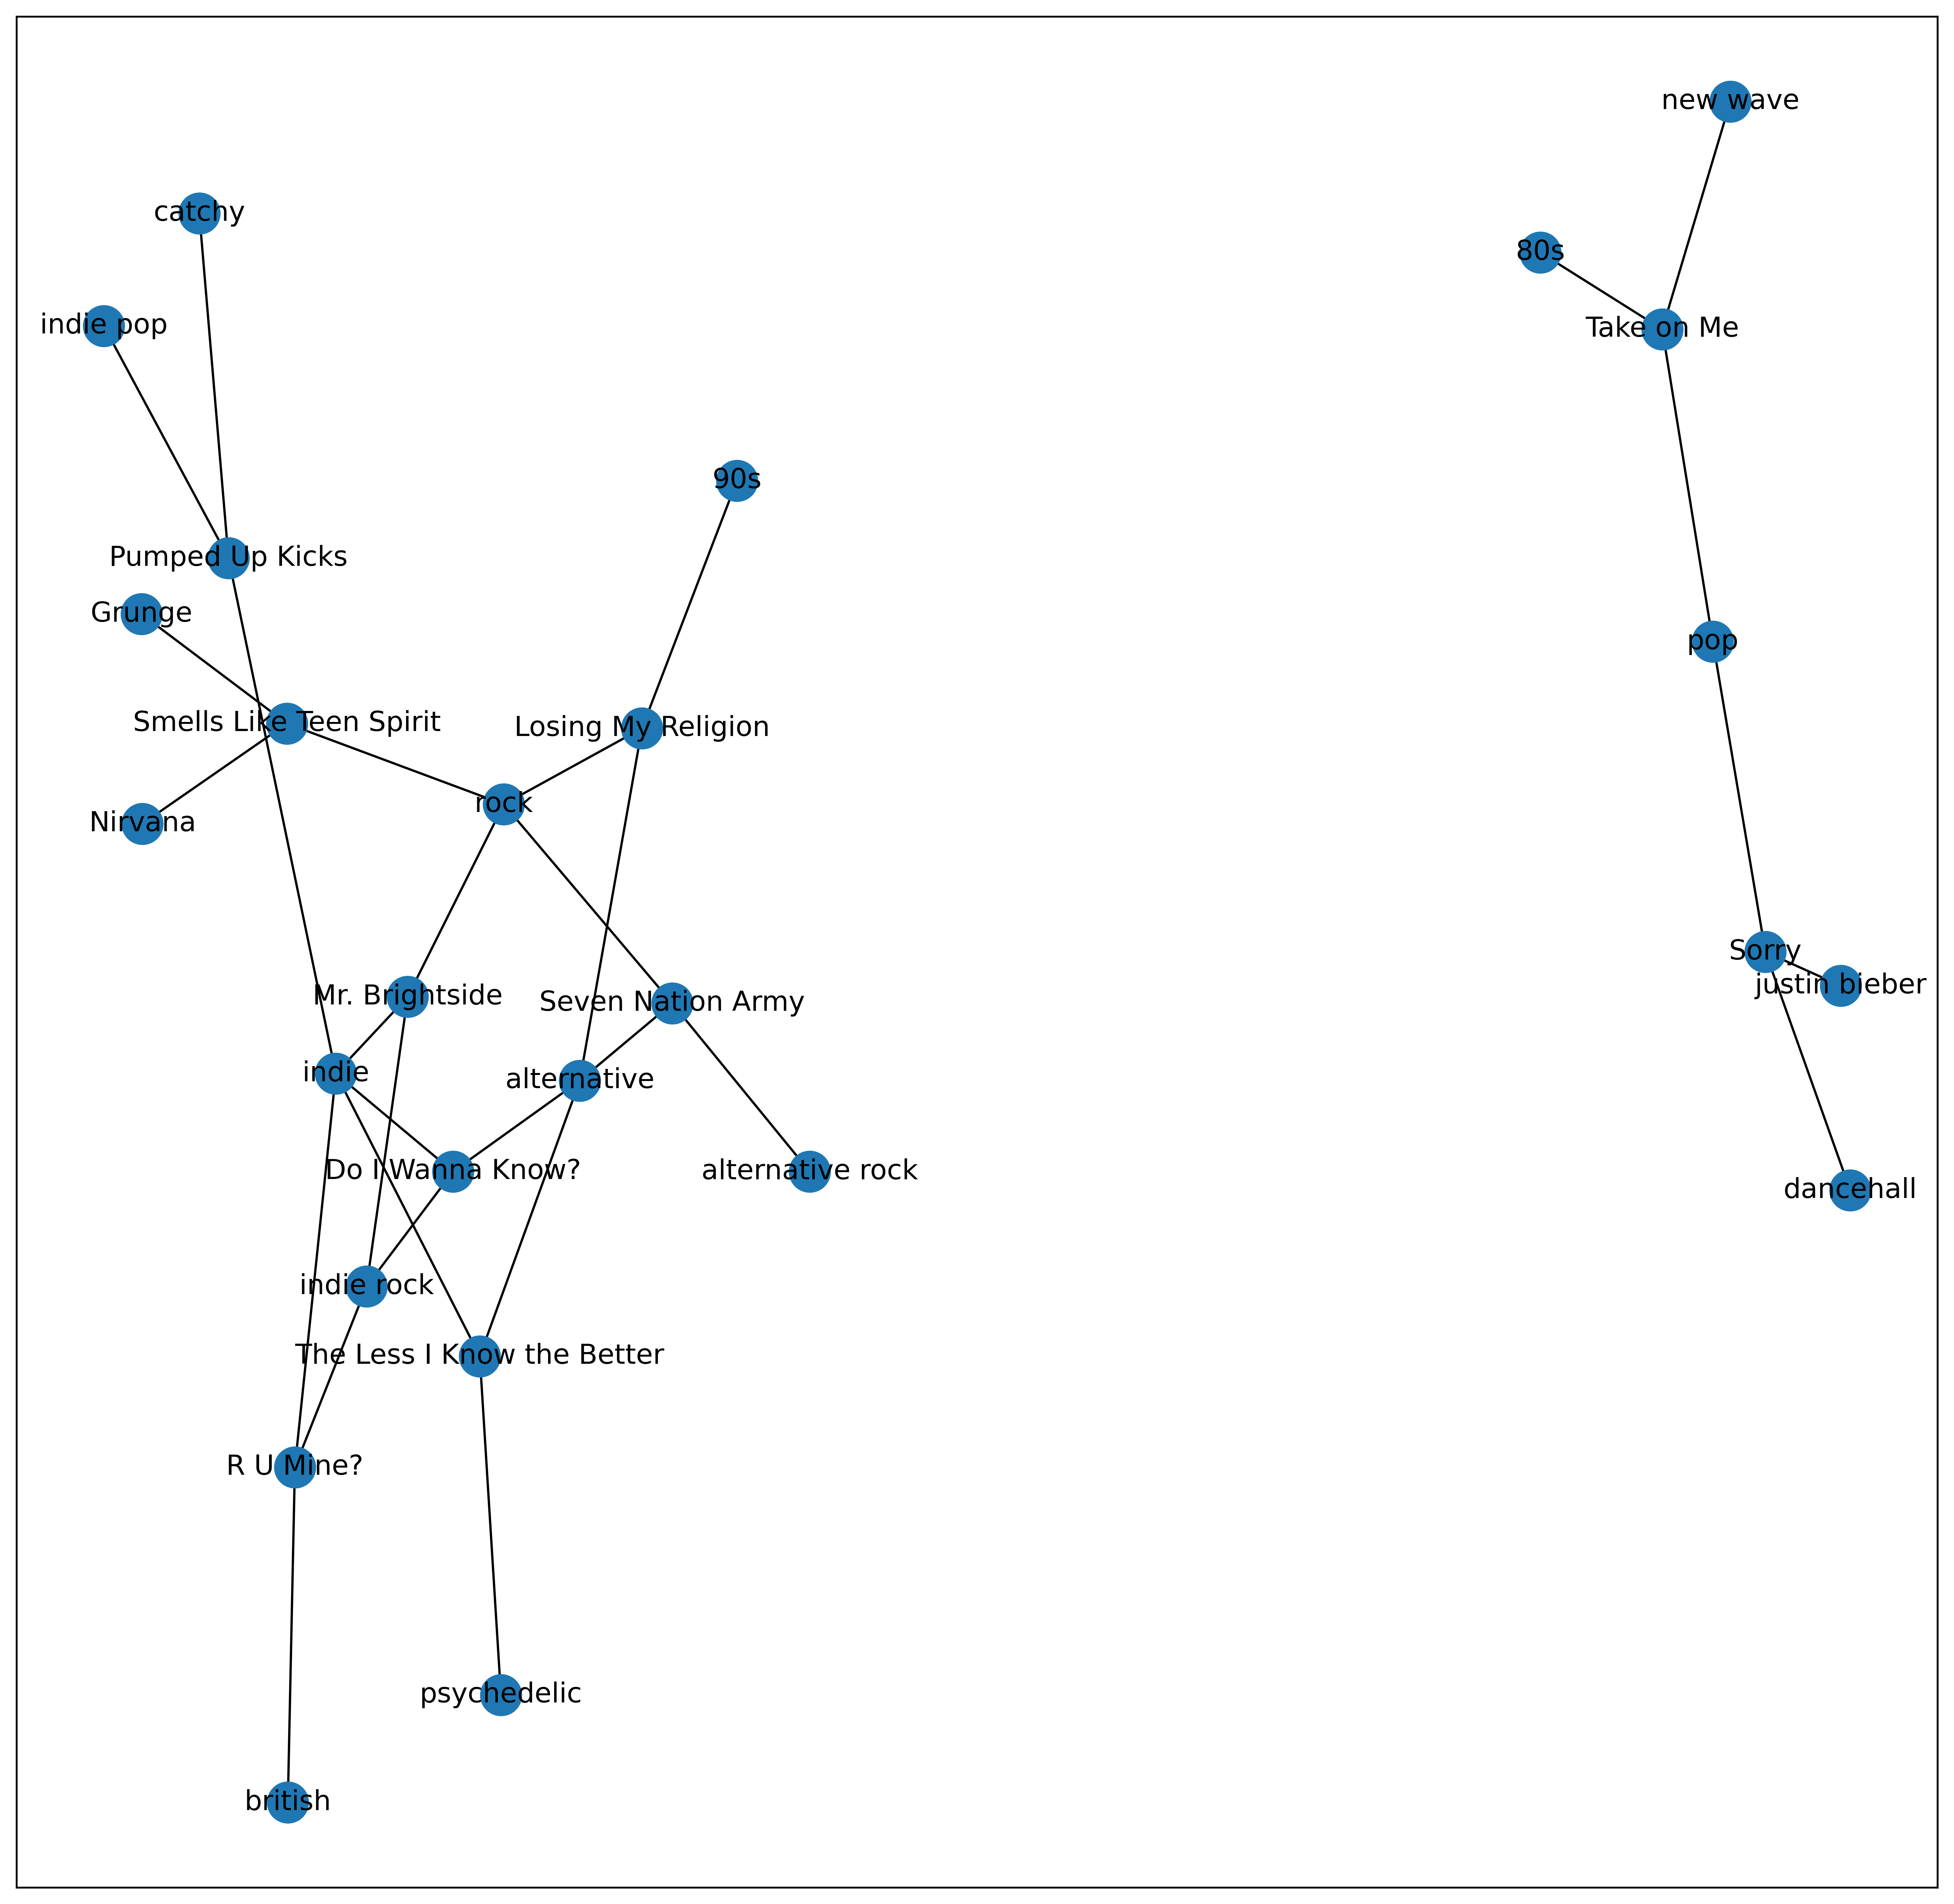

In [87]:
_graph = nx.Graph()

_graph.add_nodes_from(list(songs_graph.keys()))

for node in list(songs_graph.keys()):
    for edge in songs_graph[node]:
        _graph.add_edge(node,edge)
plt.figure(num=1,figsize=(15,15),dpi=600)
plt.rcParams.update({'font.size': 44})

nx.draw_networkx(_graph)
plt.show()

In [9]:
new_graph = {'Do I Wanna Know?': ['indie rock', 'indie', 'alternative'],
 'indie rock': ['Do I Wanna Know?', 'Mr. Brightside', 'R U Mine?'],
 'indie': ['Do I Wanna Know?',
  'Mr. Brightside',
  'R U Mine?',
  'Pumped Up Kicks',
  'The Less I Know the Better'],
 'alternative': ['Do I Wanna Know?',
  'Losing My Religion',
  'Seven Nation Army',
  'The Less I Know the Better'],
 'Mr. Brightside': ['rock', 'indie', 'indie rock'],
 'rock': ['Mr. Brightside',
  'Losing My Religion',
  'Seven Nation Army',
  'Smells Like Teen Spirit'],
 'R U Mine?': ['indie rock', 'indie', 'british'],
 'british': ['R U Mine?'],
 'Take on Me': ['80s', 'pop', 'new wave'],
 '80s': ['Take on Me'],
 'pop': ['Take on Me', 'Sorry'],
 'new wave': ['Take on Me'],
 'Pumped Up Kicks': ['indie', 'indie pop', 'catchy'],
 'indie pop': ['Pumped Up Kicks'],
 'catchy': ['Pumped Up Kicks'],
 'Losing My Religion': ['rock', '90s', 'alternative'],
 '90s': ['Losing My Religion'],
 'Seven Nation Army': ['rock', 'alternative rock', 'alternative'],
 'alternative rock': ['Seven Nation Army'],
 'Sorry': ['pop', 'justin bieber', 'dancehall'],
 'justin bieber': ['Sorry'],
 'dancehall': ['Sorry'],
 'Smells Like Teen Spirit': ['Grunge', 'rock', 'Nirvana'],
 'Grunge': ['Smells Like Teen Spirit'],
 'Nirvana': ['Smells Like Teen Spirit'],
 'The Less I Know the Better': ['indie', 'psychedelic', 'alternative'],
 'psychedelic': ['The Less I Know the Better']}
def dfs_caminhos(grafo, inicio, fim):
    pilha = [(inicio, [inicio])]
    depth = 0
    while pilha:
        vertice, caminho = pilha.pop()
        for proximo in set(grafo[vertice]) - set(caminho):
            if proximo == fim:
                yield caminho + [proximo]
            else:
                pilha.append((proximo, caminho + [proximo]))
                
for node in new_graph:
    answers = [len(x) for x in list(dfs_caminhos(new_graph, node, 'Do I Wanna Know?'))]
    lol = str(answers.count(min(answers)))+' '+str(min(answers)) if answers  else 'None'
    print(node + ": "+str(lol))

Do I Wanna Know?: None
indie rock: 1 2
indie: 1 2
alternative: 1 2
Mr. Brightside: 2 3
rock: 4 4
R U Mine?: 2 3
british: 2 4
Take on Me: None
80s: None
pop: None
new wave: None
Pumped Up Kicks: 1 3
indie pop: 1 4
catchy: 1 4
Losing My Religion: 1 3
90s: 1 4
Seven Nation Army: 1 3
alternative rock: 1 4
Sorry: None
justin bieber: None
dancehall: None
Smells Like Teen Spirit: 4 5
Grunge: 4 6
Nirvana: 4 6
The Less I Know the Better: 2 3
psychedelic: 2 4
